# DSCI 503 - Homework 08
### Matt Snyder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Problem 1: Diamonds Dataset

In [2]:
# Load the data stored in the tab-delimited file diamonds.txt into a DataFrame named diamonds. 
diamonds = pd.read_table('diamonds.txt')

# add two new columns to diamonds named ln_carat and ln_price. These columns should contain the
# natural logarithms of the carat and price columns. 
diamonds.loc[:, 'ln_carat'] = np.log(diamonds.carat)
diamonds.loc[:, 'ln_price'] = np.log(diamonds.price)

# Use head() to display the first 5 rows of this DataFrame.
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


In [8]:
# Create a 2D array named X1_num by selecting the ln_carat column from diamonds.
X1_num = diamonds.loc[:, ['ln_carat']].values # making the column selection an array gives a 2D shape to the result

# Create a 2D array named X1_cat by selecting the cut, color, and clarity columns from diamonds.
X1_cat = diamonds.loc[:, ['cut', 'color', 'clarity']].values

# Create a 1D array named y1 by selecting the ln_price column from diamonds.
y1 = diamonds.loc[:, 'ln_price'].values

# Print the shapes of all three of these arrays with messages as shown below.
print (f'Numerical Feature Array Shape:   {X1_num.shape}')
print (f'Categorical Feature Array Shape: {X1_cat.shape}')
print (f'Label Array Shape:               {y1.shape}')

Numerical Feature Array Shape:   (53940, 1)
Categorical Feature Array Shape: (53940, 3)
Label Array Shape:               (53940,)


In [9]:
# Create a OneHotEncoder() object setting sparse=False.
encoder = OneHotEncoder(sparse_output=False) # sparse=False

# Fit the encoder to the categorical features.
encoder.fit(X1_cat)

# Use the encoder to encode the categorical features, storing the result in a variable named X1_enc.
X1_enc = encoder.transform(X1_cat)

# Print the shape of X1_enc with a message as shown below.
print (f'Encoded Feature Array Shape: {X1_enc.shape}')

Encoded Feature Array Shape: (53940, 20)


In [11]:
# Use np.hstack to combine X1_num and X1_enc into a single array named X1 with the numerical column
# appearing first in the new array.
X1 = np.hstack([X1_num, X1_enc])

# 2. Print the shape of X1 with a message as shown below.
print (f'Feature Array Shape: {X1.shape}')

Feature Array Shape: (53940, 21)


In [12]:
# Use train_test_split() to split the data into training and holdout sets using an 80/20 split. Name the
# resulting arrays X1_train, X1_hold, y1_train, and y1_hold. Set random state=1.
X1_train, X1_hold, y1_train, y1_hold = train_test_split(X1, y1, test_size=0.2, random_state=1)

# Use train_test_split() to split the holdout data into validation and test sets using a 50/50 split. Name the
# resulting arrays X1_valid, X1_test, y1_valid, and y1_test. Set random state=1.
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_hold, y1_hold, test_size=0.5, random_state=1)

# Print the shapes of X1_train, X1_valid, and X1_test with messages as shown below
print (f'Training Features Shape:   {X1_train.shape}')
print (f'Validation Features Shape: {X1_valid.shape}')
print (f'Test Features Shape:       {X1_test.shape}')

Training Features Shape:   (43152, 21)
Validation Features Shape: (5394, 21)
Test Features Shape:       (5394, 21)


### Linear Regression Model with One Feature

In [19]:
# Create a linear regression model named dia_mod_1.
dia_mod_1 = LinearRegression()

# Fit the model to the training data, using only the first (numerical) column of X1_train.
X_first_column = X1_train[:,0].reshape(-1, 1)
dia_mod_1.fit(X_first_column, y1_train)

# Calculate the r-squared values for the training and validation set. Note that when using the score() method
# for this model, you will need to provide it with only the first column of the feature array.
X_valid_first_column = X1_valid[:,0].reshape(-1, 1)
train_r2 = dia_mod_1.score(X_first_column, y1_train)
valid_r2 = dia_mod_1.score(X_valid_first_column, y1_valid)

# Print the results with messages as shown below. Round the scores to 4 decimal places.
print (f'Training r-Squared:   {round(train_r2, 4)}')
print (f'Validation r-Squared: {round(valid_r2, 4)}')

Training r-Squared:   0.933
Validation r-Squared: 0.9348


### Linear Regression Model with Several Features

In [20]:
# Create a linear regression model named dia_mod_2.
dia_mod_2 = LinearRegression()

# Fit the model to the training data using all features in X1_train.
dia_mod_2.fit(X1_train, y1_train)

# Calculate the r-squared values for the training and validation set.
train_r2 = dia_mod_2.score(X1_train, y1_train)
valid_r2 = dia_mod_2.score(X1_valid, y1_valid)

# Print the results with messages as shown below. Round the scores to 4 decimal places.
print (f'Training r-Squared:   {round(train_r2, 4)}')
print (f'Validation r-Squared: {round(valid_r2, 4)}')

Training r-Squared:   0.9825
Validation r-Squared: 0.9834


In [22]:
# Score the model dia_mod_2 using the test set.
valid_r2 = dia_mod_2.score(X1_test, y1_test)

# Print the result with a message as shown below. Round the score to 4 decimal places.
print (f'Testing r-Squared: {round(valid_r2, 4)}')

Testing r-Squared: 0.9825


## Problem 2: Census Dataset

In [23]:
# Load the data stored in the tab-delimited file census.txt into a DataFrame named census. 
census = pd.read_table('census.txt')

# Use head() to display the first 10 rows of this DataFrame.
census.head(10)

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [24]:
# Print the shape of the census DataFrame.
census.shape

(32561, 15)

In [85]:
# Without creating any new DataFrame variables, select the salary column, and then call its value_counts() method.
val_cnts = census.loc[:,'salary'].value_counts()

# Display the result.
val_cnts.head()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Prepare the Data

In [56]:
# Create a 2D array named X2_num by selecting the columns of census that represent numerical features.
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
mask = ~np.isin(census.columns, categorical_columns) # bitwise-not of is-in categorical column list
numerical_columns = census.columns[mask]
X2_num_df = census.loc[:, numerical_columns[:-1]] # omit salary column
X2_num = X2_num_df.values

# Create a 2D array named X2_cat by selecting the columns of census that represent categorical features.
X2_cat = census.loc[:, categorical_columns].values

# Create a 1D array named y2 by selecting the salary column.
y2 = census.loc[:, 'salary'].values

# Print the shapes of all three of these arrays with messages as shown below. 
print (f'Numerical Feature Array Shape:   {X2_num.shape}')
print (f'Categorical Feature Array Shape: {X2_cat.shape}')
print (f'Label Array Shape:               {y2.shape}')

Numerical Feature Array Shape:   (32561, 6)
Categorical Feature Array Shape: (32561, 8)
Label Array Shape:               (32561,)


In [57]:
# Create a OneHotEncoder() object setting sparse=False.
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the categorical features.
encoder.fit(X2_cat)

# Use the encoder to encode the categorical features, storing the result in a variable named X2_enc.
X2_enc = encoder.transform(X2_cat)

# Print the shape of X2_enc with a message as shown below.
print (f'Encoded Feature Array Shape: {X2_enc.shape}')

Encoded Feature Array Shape: (32561, 102)


In [58]:
# Use np.hstack to combine X2_num and X2_enc into a single array named X2.
X2 = np.hstack([X2_num, X2_enc])

# Print the shape of X2 with a message as shown below.
print (f'Feature Array Shape: {X2.shape}')

Feature Array Shape: (32561, 108)


In [61]:
# Use train_test_split() to split the data into training and holdout sets using an 70/30 split. 
# Name the resulting arrays X2_train, X2_hold, y2_train, and y2_hold. Set random state=1. Use stratified sampling.
X2_train, X2_hold, y2_train, y2_hold = train_test_split(X2, y2, test_size = 0.3, random_state=1, stratify=y2)

# Use train_test_split() to split the holdout data into validation and test sets using a 50/50 split. 
# Name the resulting arrays X2_valid, X2_test, y2_valid, and y2_test. Set random state=1. Use stratified sampling.
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_hold, y2_hold, test_size = 0.5, random_state=1, stratify=y2_hold)

# Print the shapes of X2_train, X2_valid, and X2_test with messages as shown below. 
print (f'Training Features Shape:   {X2_train.shape}')
print (f'Validation Features Shape: {X2_valid.shape}')
print (f'Test Features Shape:       {X2_test.shape}')

Training Features Shape:   (22792, 108)
Validation Features Shape: (4884, 108)
Test Features Shape:       (4885, 108)


### Logistic Regression Model

In [72]:
# Create a logistic regression model named lr_mod setting solver='lbfgs', and max_iter=1000. Set penalty='none', unless that results in an error, in which case, set C=10e1000.
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, C=10e1000)  # not using penalty=None

# Fit your model to the training data.
lr_mod.fit(X2_train, y2_train)

# Calculate the training and validation accuracy with messages as shown below. Round the scores to 4 decimal places.
train_r2 = lr_mod.score(X2_train, y2_train)
valid_r2 = lr_mod.score(X2_valid, y2_valid)

print (f'Training Accuracy:   {round(train_r2, 4)}')
print (f'Validation Accuracy: {round(valid_r2, 4)}')

Training Accuracy:   0.8428
Validation Accuracy: 0.8479


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Models

In [74]:
# Create empty lists named dt_train_acc and dt_valid_acc. These lists will store the accuracy scores that we calculate for each model.
dt_train_acc = []
dt_valid_acc = []

# Create a range variable named depth_range to represent a sequence of integers from 2 to 30.
depth_range = range(2, 31)

# Loop over the values in depth_range.
for i in depth_range:
    # Use NumPy to set a random seed of 1. This should be done inside the loop.
    np.random.seed(1)
    # Create a decision tree model named temp_tree with max_depth equal to the current value from depth_range that is being considered.
    temp_tree = DecisionTreeClassifier(max_depth=i)
    
    # Fit the model to the training data.
    temp_tree.fit(X2_train, y2_train)
    
    # Calculate the training and validation accuracy for temp_tree, appending the resulting values to the appropriate lists.
    dt_train_acc.append(temp_tree.score(X2_train, y2_train))
    dt_valid_acc.append(temp_tree.score(X2_valid, y2_valid))
    
# Use np.argmax to determine the index of the maximum value in dt_valid_acc. Store the result in dt_idx.
dt_idx = np.argmax(dt_valid_acc)

# Use dt_idx and depth_range to find the optimal value for the max_depth hyperparameter. Store the result in dt_opt_depth.
dt_opt_depth = depth_range[dt_idx]

# Use dt_idx with the lists dt_train_acc and dt_valid_acc to determine the training and validation accuracies for the optimal model found.
opt_train_acc = dt_train_acc[dt_idx]
opt_valid_acc = dt_valid_acc[dt_idx]

# Display the values found in Steps 5 and 6 with messages as shown below. Round the accuracy scores to 4 decimal places.
print (f'Optimal value for max_depth:           {dt_opt_depth}')
print (f'Training Accuracy for Optimal Model:   {round(opt_train_acc, 4)}')
print (f'Validation Accuracy for Optimal Model: {round(opt_valid_acc, 4)}')

Optimal value for max_depth:           6
Training Accuracy for Optimal Model:   0.8585
Validation Accuracy for Optimal Model: 0.8565


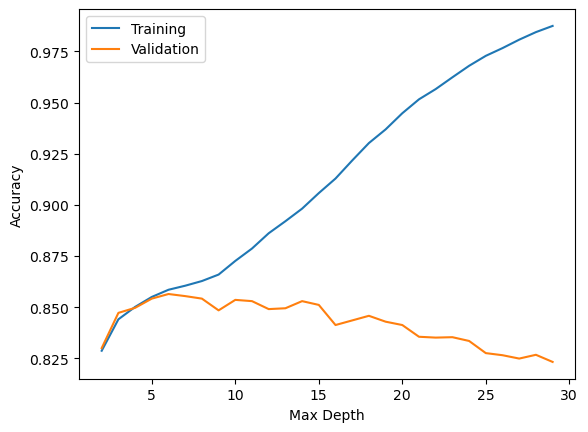

In [79]:
# Create a figure with two line plots on the same set of axes. One line plot should plot values of dt_train_acc against depth_range 
# The plot should contain a legend with two items that read "Training" 
plt.plot(depth_range, dt_train_acc, label='Training')

# and the other should plot values of dt_valid_acc against depth_range. 
# label "Validation" for legend
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.legend()

# The x-axis should be labeled "Max Depth" and the y-axis should be labeled "Accuracy". 
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.show()

### Random Forest Models

In [80]:
# Create empty lists named rf_train_acc and rf_valid_acc. These lists will store the accuracy scores that we calculate for each model.
rf_train_acc = []
rf_valid_acc = []

# Loop over the values in depth_range.
for i in depth_range:

    # Use NumPy to set a random seed of 1. This should be done inside the loop.
    np.random.seed(1)
    
    # Create a random forest model named temp_forest with max_depth equal to the current value from depth_range that is being considered. 
    # Set the parameter n_estimators to 100.
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=i)
    
    # Fit the model to the training data.
    temp_forest.fit(X2_train, y2_train)
    
    # Calculate the training and validation accuracy for temp_forest, appending the resulting values to the appropriate lists.
    rf_train_acc.append(temp_forest.score(X2_train, y2_train))
    rf_valid_acc.append(temp_forest.score(X2_valid, y2_valid))
    
# Use np.argmax to determine the index of the maximum value in rf_valid_acc. Store the result in rf_idx.
rf_idx = np.argmax(rf_valid_acc)

# Use rf_idx and depth_range to find the optimal value for the max_depth hyperparameter. Store the result in rf_opt_depth.
rf_opt_depth = depth_range[rf_idx]

# Use rf_idx with the lists rf_train_acc and rf_valid_acc to determine the training and validation accuracies for the optimal model found.
opt_train_acc = rf_train_acc[rf_idx]
opt_valid_acc = rf_valid_acc[rf_idx]

# Display the values found in Steps 4 and 5 with messages as shown below. Round the accuracy scores to 4 decimal places.
print (f'Optimal value for max_depth:           {rf_opt_depth}')
print (f'Training Accuracy for Optimal Model:   {round(opt_train_acc, 4)}')
print (f'Validation Accuracy for Optimal Model: {round(opt_valid_acc, 4)}')

Optimal value for max_depth:           19
Training Accuracy for Optimal Model:   0.9192
Validation Accuracy for Optimal Model: 0.8643


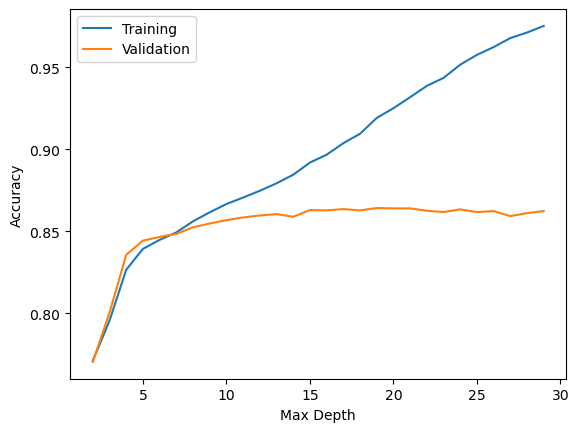

In [81]:
# Create a figure with two line plots on the same set of axes. One line plot should plot values of rf_train_acc against depth_range
# The plot should contain a legend with two items that read "Training" 
plt.plot(depth_range, rf_train_acc, label='Training')

# and the other should plot values of rf_valid_acc against depth_range. 
# label "Validation" for legend
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.legend()

# The x-axis should be labeled "Max Depth" and the y-axis should be labeled "Accuracy". 
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.show()

### Evaluate Final Model

In [84]:
# If your final model is a decision tree or random forest model, use NumPy to set a random seed of 1.
np.random.seed(1)

# Recreate the best model you found, using the parameter values that produced that model. Store the resulting
# model in a variable named final_model.
final_model = RandomForestClassifier(n_estimators=100, max_depth=19)

# Fit this model to the training set.
final_model.fit(X2_train, y2_train)

# Print the training accuracy, validation accuracy, and test accuracy for the final model with messages as shown
# below. round the accuracy scores to four decimal places.

print (f'Training Accuracy for Final Model:   {round(final_model.score(X2_train, y2_train),4)}')
print (f'Validation Accuracy for Final Model: {round(final_model.score(X2_valid, y2_valid),4)}')
print (f'Testing Accuracy for Final Model:    {round(final_model.score(X2_test, y2_test),4)}')

Training Accuracy for Final Model:   0.9192
Validation Accuracy for Final Model: 0.8643
Testing Accuracy for Final Model:    0.8624
